In [153]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv('MSFT_5Y.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-21,55.799999,56.230000,55.419998,55.779999,51.148682,38909100
1,2016-04-22,51.910000,52.430000,50.770000,51.779999,47.480804,126834100
2,2016-04-25,51.779999,52.130001,51.630001,52.110001,47.783394,33226900
3,2016-04-26,52.259998,52.349998,51.090000,51.439999,47.169029,33532600
4,2016-04-27,51.480000,51.500000,50.549999,50.939999,46.710537,43369300
5,2016-04-28,50.619999,50.770000,49.560001,49.900002,45.756889,43134800


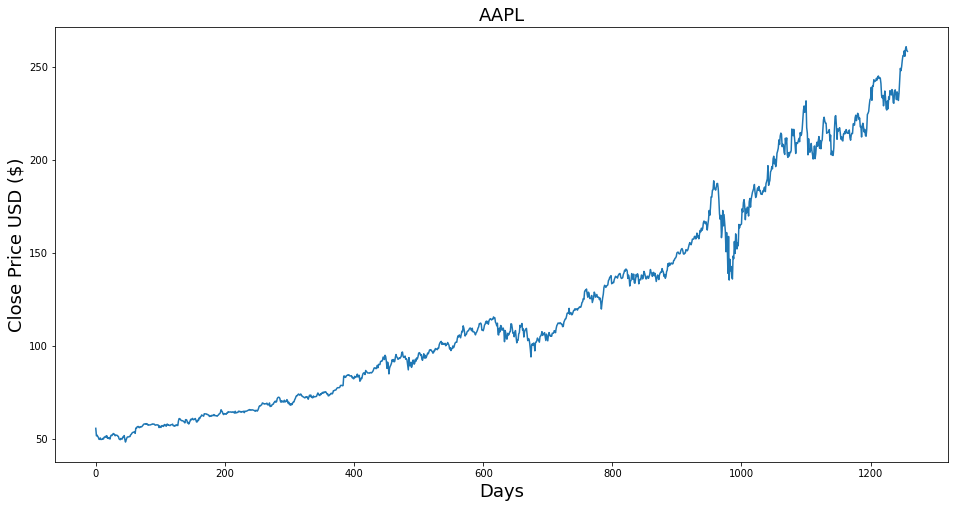

In [200]:
plt.figure(figsize=(16,8))
plt.title('AAPL', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [201]:
# df = df[['Close']]
df = df.drop(['Date'], 1)
df.tail(65)

,Open,High,Low,Close,Adj Close,Volume
1193,213.520004,214.509995,212.029999,212.649994,212.161346,31746500
1194,213.750000,216.979996,212.630005,216.440002,215.942642,30480900
1195,217.699997,225.789993,217.289993,224.339996,223.824493,37777300
1196,224.699997,226.300003,222.419998,224.970001,224.453049,30749600
1197,227.080002,230.070007,225.800003,225.949997,225.430786,30172700
...,...,...,...,...,...,...
1253,257.480011,258.829987,255.160004,255.589996,255.589996,23070900
1254,257.929993,259.929993,257.730011,259.500000,259.500000,25627500
1255,259.470001,261.000000,257.600006,260.739990,260.739990,24856900
1256,260.190002,261.480011,257.820007,258.739990,258.739990,23209300


In [214]:
predict_days = 30
df['Prediction'] = df[['Close']].shift(-predict_days)
df.tail(65)

,Open,High,Low,Close,Adj Close,Volume,Prediction
1193,213.520004,214.509995,212.029999,212.649994,212.161346,31746500,233.869995
1194,213.750000,216.979996,212.630005,216.440002,215.942642,30480900,227.559998
1195,217.699997,225.789993,217.289993,224.339996,223.824493,37777300,226.729996
1196,224.699997,226.300003,222.419998,224.970001,224.453049,30749600,231.600006
1197,227.080002,230.070007,225.800003,225.949997,225.430786,30172700,227.389999
...,...,...,...,...,...,...,...
1253,257.480011,258.829987,255.160004,255.589996,255.589996,23070900,NaN
1254,257.929993,259.929993,257.730011,259.500000,259.500000,25627500,NaN
1255,259.470001,261.000000,257.600006,260.739990,260.739990,24856900,NaN
1256,260.190002,261.480011,257.820007,258.739990,258.739990,23209300,NaN


In [215]:
x = np.array(df.drop(columns=['Prediction']))
x_train = np.array(df.drop(columns=['Prediction']))[:-2*predict_days]
# print(x_train)
y = np.array(df['Prediction'])
y_train = np.array(df['Prediction'])[:-2*predict_days]
# print(y_train)

In [216]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0, shuffle=False)

In [217]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [218]:
x_future = df.drop(['Prediction'], 1)[:-2*predict_days]
# x_future = df.drop(['Prediction'], 1)
#Get the last 'x' rows
x_future = x_future.tail(2*predict_days)
#Convert the data set into a numpy array
x_future = np.array(x_future)
# x_future

In [219]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print( tree_prediction )
# print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
# print(lr_prediction)

[211.800003 210.520004 213.259995 214.199997 214.130005 219.279999
 219.419998 218.589996 222.589996 223.940002 221.020004 222.75
 224.960007 224.149994 221.679993 222.419998 217.690002 217.899994
 212.25     218.289993 219.619995 217.490005 214.929993 216.339996
 213.020004 212.649994 216.440002 224.339996 224.970001 225.949997
 229.529999 232.330002 232.899994 238.929993 231.960007 239.649994
 239.509995 243.       242.009995 242.199997 242.470001 243.770004
 242.820007 244.490005 244.990005 243.699997 244.199997 243.789993
 240.970001 234.509995 233.270004 234.550003 228.990005 232.380005
 236.940002 233.869995 227.559998 226.729996 231.600006 227.389999]


           Close  Prediction
1198  229.529999  211.800003
1199  232.330002  210.520004
1200  232.899994  213.259995
1201  238.929993  214.199997
1202  231.960007  214.130005
1203  239.649994  219.279999
1204  239.509995  219.419998
1205  243.000000  218.589996
1206  242.009995  222.589996
1207  242.199997  223.940002
1208  242.470001  221.020004
1209  243.770004  222.750000
1210  242.820007  224.960007
1211  244.490005  224.149994
1212  244.990005  221.679993
1213  243.699997  222.419998
1214  244.199997  217.690002
1215  243.789993  217.899994
1216  240.970001  212.250000
1217  234.509995  218.289993
1218  233.270004  219.619995
1219  234.550003  217.490005
1220  228.990005  214.929993
1221  232.380005  216.339996
1222  236.940002  213.020004
1223  233.869995  212.649994
1224  227.559998  216.440002
1225  226.729996  224.339996
1226  231.600006  224.970001
1227  227.389999  225.949997
1228  233.779999  229.529999
1229  232.419998  232.330002
1230  237.130005  232.899994
1231  235.7500

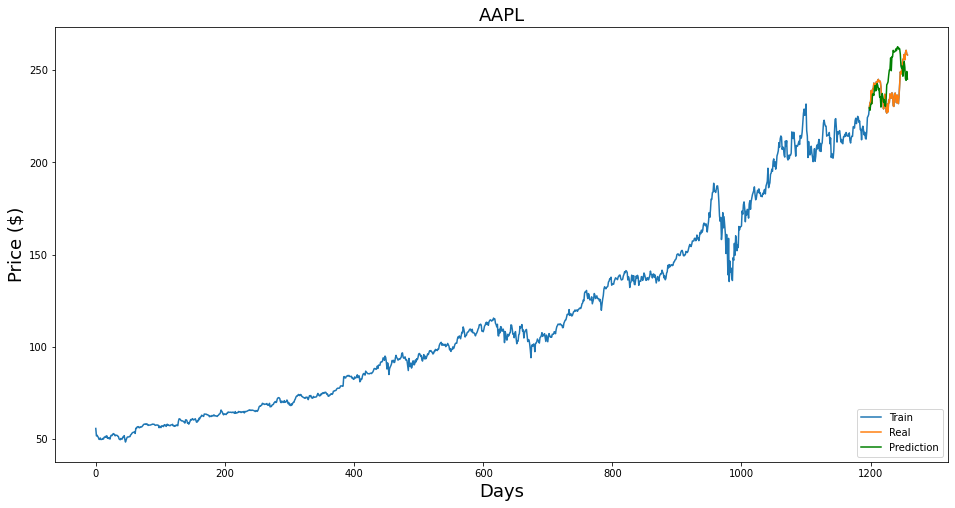

In [220]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  (df[x_train.shape[0]:])[['Close']]
valid['Prediction'] = predictions
print(valid)
first_vals = valid.iloc[0]
# print(first_vals)
valid = valid.sub([0, first_vals['Prediction']-first_vals['Close']], axis='columns')
print(valid)
plt.figure(figsize=(16,8))
plt.title('AAPL', fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Price ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Prediction'], color="green")
plt.legend(['Train', 'Real', 'Prediction' ], loc='lower right')
plt.show()

           Close  Prediction
1198  229.529999  220.264807
1199  232.330002  214.734374
1200  232.899994  215.772805
1201  238.929993  211.987787
1202  231.960007  212.622964
1203  239.649994  216.177155
1204  239.509995  222.667165
1205  243.000000  226.655489
1206  242.009995  225.144373
1207  242.199997  227.631382
1208  242.470001  220.188358
1209  243.770004  223.143519
1210  242.820007  222.658184
1211  244.490005  221.451115
1212  244.990005  222.620657
1213  243.699997  222.000105
1214  244.199997  227.975544
1215  243.789993  226.832286
1216  240.970001  226.781739
1217  234.509995  225.757417
1218  233.270004  228.190751
1219  234.550003  227.825414
1220  228.990005  229.423204
1221  232.380005  227.158329
1222  236.940002  230.108273
1223  233.869995  228.162791
1224  227.559998  229.550453
1225  226.729996  228.697500
1226  231.600006  228.661765
1227  227.389999  229.860504
1228  233.779999  227.319131
1229  232.419998  227.013836
1230  237.130005  227.336950
1231  235.7500

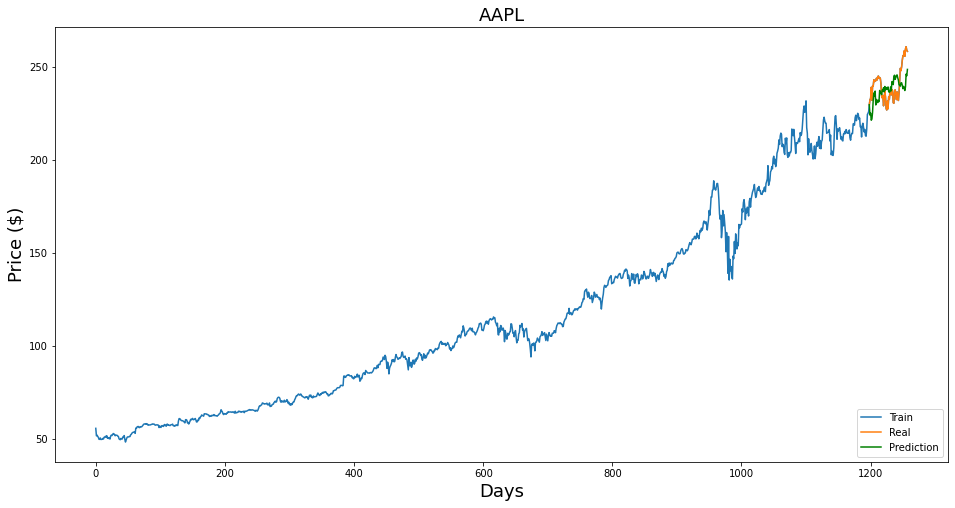

In [221]:
#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  (df[x_train.shape[0]:])[['Close']]
valid['Prediction'] = predictions
print(valid)
first_vals = valid.iloc[0]
# print(first_vals)
valid = valid.sub([0, first_vals['Prediction']-first_vals['Close']], axis='columns')
print(valid)
plt.figure(figsize=(16,8))
plt.title('AAPL', fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Price ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Prediction'], color="green")
plt.legend(['Train', 'Real', 'Prediction' ], loc='lower right')
plt.show()